In [21]:
import numpy as np
import pandas as pd

In [22]:
import pylab as pl
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,r2_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

In [24]:
url = 'https://raw.githubusercontent.com/Darwin2016/dataset2022/refs/heads/main/dataSETS/diabetes5050.csv'
dataset = pd.read_csv(url, delimiter=',')
dataset.head()

,TieneDiabetes,PresionAlta,ColesterolAlto,ControlDeColesterol,IMC,Fumador,DerrameCerebral,EnfermedadCoronarioOInfartoDeMiocardio,ActividadFisica,IngestoDeFrutas,IngestoDeVegetales,Alcoholico,SaludGeneral,SaludMental,LesionesFisicas,DificultadEnCaminar,Sexo,Edad,Educacion
0,0.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0,1.0,1.0,13.0,5.0
1,0.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,1.0,2.0,13.0,3.0
2,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,30.0,0.0,0.0,2.0,4.0,6.0
3,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0
4,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,4.0


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   TieneDiabetes                           75904 non-null  float64
 1   PresionAlta                             75904 non-null  float64
 2   ColesterolAlto                          75904 non-null  float64
 3   ControlDeColesterol                     75904 non-null  float64
 4   IMC                                     75904 non-null  float64
 5   Fumador                                 75904 non-null  float64
 6   DerrameCerebral                         75904 non-null  float64
 7   EnfermedadCoronarioOInfartoDeMiocardio  75904 non-null  float64
 8   ActividadFisica                         75904 non-null  float64
 9   IngestoDeFrutas                         75904 non-null  float64
 10  IngestoDeVegetales                      75904 non-null  fl

In [26]:
dataset.groupby('TieneDiabetes').size()

,0
TieneDiabetes,
0.0,35346
1.0,40558


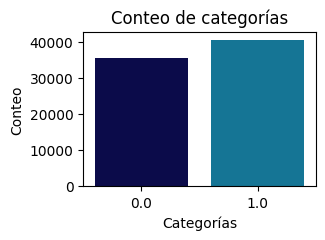

In [27]:
plt.figure(figsize=(3, 2))

# Crear una paleta específica
palette_colors = sns.color_palette('ocean', n_colors=len(dataset['TieneDiabetes'].unique()))

sns.countplot(data=dataset, x='TieneDiabetes', hue='TieneDiabetes',
              palette=palette_colors, legend=False)

# Añadir etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Conteo')
plt.title('Conteo de categorías')

plt.show()

In [28]:
# Split into input (X) and output (Y) variables.
X = dataset.iloc[:,1:19]
y = dataset.iloc[:,0]

In [9]:
X.head()

,PresionAlta,ColesterolAlto,ControlDeColesterol,IMC,Fumador,DerrameCerebral,EnfermedadCoronarioOInfartoDeMiocardio,ActividadFisica,IngestoDeFrutas,IngestoDeVegetales,Alcoholico,SaludGeneral,SaludMental,LesionesFisicas,DificultadEnCaminar,Sexo,Edad,Educacion
0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0,1.0,1.0,13.0,5.0
1,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,1.0,2.0,13.0,3.0
2,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,30.0,0.0,0.0,2.0,4.0,6.0
3,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0
4,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,4.0


In [29]:
print(X.shape)

(75904, 18)


In [30]:
# Shuffle and split the data into training and testing subsets
# Se aplica estratificacion en la seleccion.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)

In [31]:
print(X_train.shape,X_test.shape)

(60723, 18) (15181, 18)


In [32]:
acc=[]  #Lista para graficar los accuracy de todos los modelos

In [35]:
from sklearn.linear_model import LogisticRegression

modelLR=LogisticRegression(penalty='l2',C=0.03, solver='lbfgs',max_iter=1000)
modelLR.fit(X_train,y_train)
yhat = modelLR.predict(X_test)
yhat_prob = modelLR.predict_proba(X_test)
logReg_score=metrics.accuracy_score(y_test, yhat)
print("LogisticRegression's Accuracy:{0}".format(metrics.accuracy_score(y_test, yhat)))
acc.append(logReg_score)

LogisticRegression's Accuracy:0.7548251103352875


In [36]:
acc

[0.7548251103352875]

In [37]:
#Modelo de Árboles de Decisión Clasificación porcentaje de precicion del algoritmo
modelDT = DecisionTreeClassifier(criterion="gini", max_depth=3)
modelDT.fit(X_train, y_train)
y_pred = modelDT.predict(X_test)
dt_score=metrics.accuracy_score(y_test, y_pred)
acc.append(dt_score)

In [38]:
acc

[0.7548251103352875, 0.7219550754232265]

Profundidad del árbol: 3
Número de nodos terminales: 8
Número de clases: 2
Clases: [0. 1.]


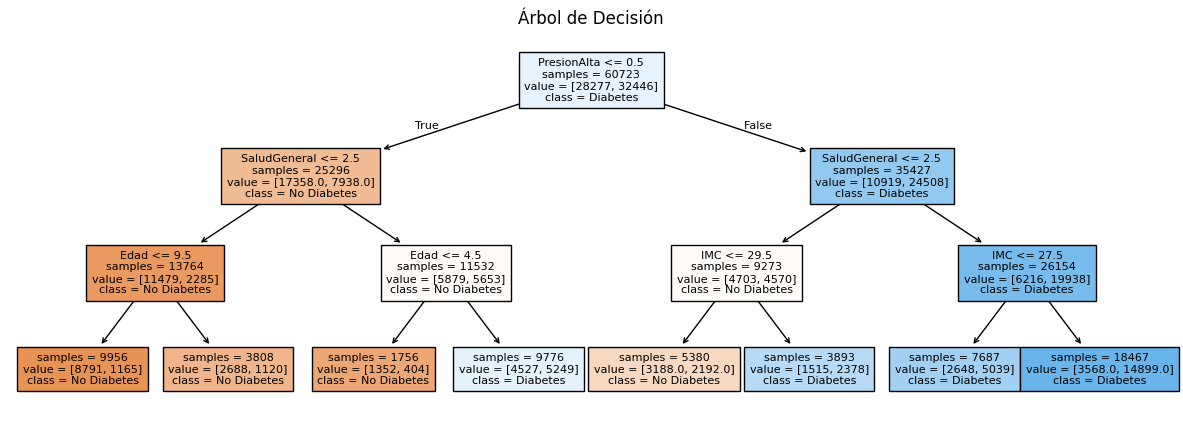

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))

print(f"Profundidad del árbol: {modelDT.get_depth()}")
print(f"Número de nodos terminales: {modelDT.get_n_leaves()}")

# Obtener las clases únicas de tu modelo
n_classes = len(modelDT.classes_)
print(f"Número de clases: {n_classes}")
print(f"Clases: {modelDT.classes_}")

# Crear los nombres de clase según corresponda
# Si es un problema binario (2 clases)
if n_classes == 2:
    class_names = ['No Diabetes', 'Diabetes']  # Ajusta los nombres según tu problema
# Si es un problema multiclase
else:
    class_names = [f'Clase {i}' for i in range(n_classes)]

plot = plot_tree(
    decision_tree = modelDT,
    feature_names = dataset.drop(columns = "TieneDiabetes").columns,
    class_names = class_names,  # Usar la lista correcta de nombres
    filled = True,
    impurity = False,
    fontsize = 8,
    precision = 2,
    ax = ax
)

plt.title("Árbol de Decisión")
plt.show()

Profundidad del árbol: 3
Número de nodos terminales: 8


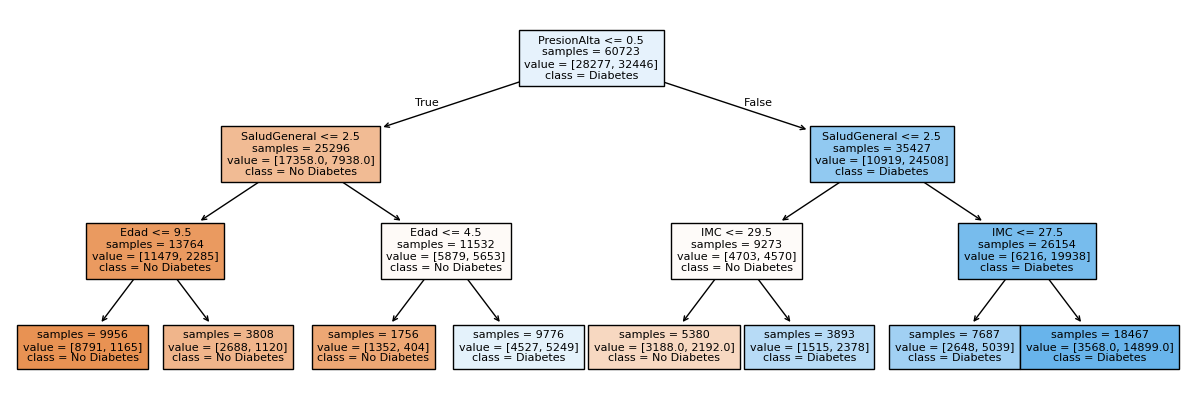

In [40]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(15, 5))

print(f"Profundidad del árbol: {modelDT.get_depth()}")
print(f"Número de nodos terminales: {modelDT.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelDT,
            feature_names = dataset.drop(columns = "TieneDiabetes").columns,
            class_names   = ['No Diabetes','Diabetes'],
            filled        = True,
            impurity      = False,
            fontsize      = 8,
            precision     = 2,
            ax            = ax
       )

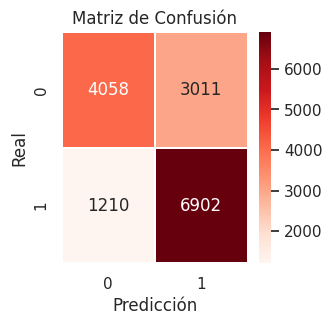

In [41]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix,classification_report

sns.set()

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Blues"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Reds",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('DT.jpg')

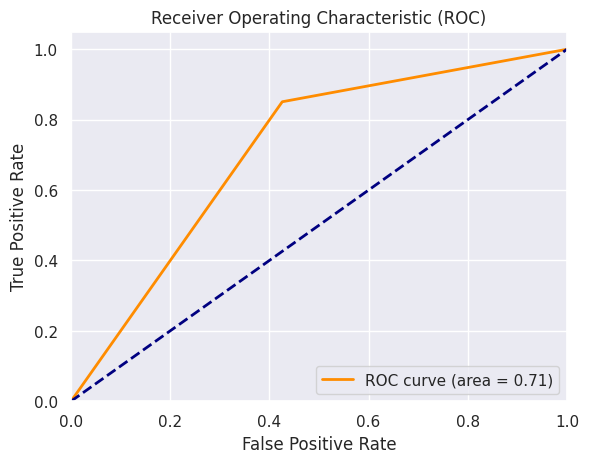

In [42]:
#from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción en el conjunto de prueba
y_probs = modelDT.predict(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))

Accuracy: 0.7219550754232265
Precision: 0.6962574397256128
Recall: 0.8508382642998028
F1:  0.7658252427184467


In [44]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

modelRF = RandomForestClassifier(n_estimators=25)
modelRF.fit(X_train,y_train)
randomForest_predict = modelRF.predict(X_test)
randomForest_score = metrics.accuracy_score(y_test, randomForest_predict)
print("Random Forest Score :",randomForest_score)
acc.append(randomForest_score)

Random Forest Score : 0.7283446413279757


In [45]:
acc

[0.7548251103352875, 0.7219550754232265, 0.7283446413279757]

In [46]:
from types import new_class
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier(random_state=100,
          n_estimators=150,min_samples_split=100, max_depth=6)
modelGB.fit(X_train, y_train)
gbk_predict = modelGB.predict(X_test)
gbk_score = modelGB.score(X_test,y_test)
gbos_score=metrics.accuracy_score(y_test, gbk_predict)
print("Gradient Boosting Score :",gbos_score)
acc.append(gbos_score)

Gradient Boosting Score : 0.758711547328898


In [47]:
y_pred = gbk_predict

In [48]:
acc

[0.7548251103352875, 0.7219550754232265, 0.7283446413279757, 0.758711547328898]

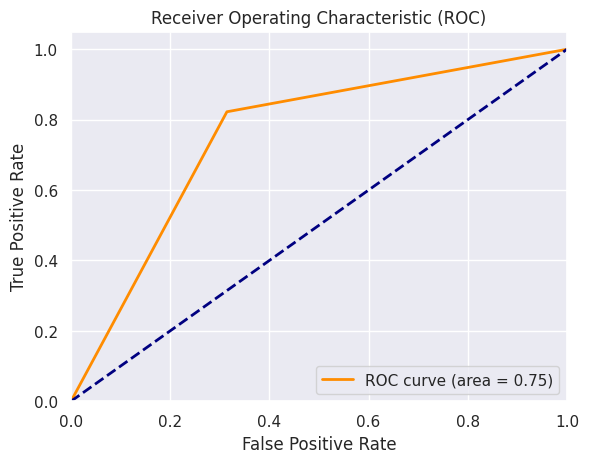

In [49]:
#from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción en el conjunto de prueba
y_probs = modelGB.predict(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))

Accuracy: 0.758711547328898
Precision: 0.7501405599910042
Recall: 0.8223619329388561
F1:  0.7845927668332844


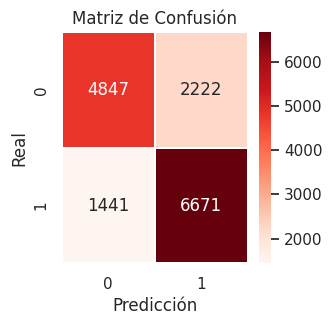

In [51]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix,classification_report

sns.set()

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Blues"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Reds",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('GB.jpg')

In [52]:
#XGBoosting
import xgboost as xgb
from sklearn.linear_model import LinearRegression as LR

modelXGB = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123)
modelXGB.fit(X_train, y_train)
preds_xgb = modelXGB.predict(X_test)

accuracy_xgb = float(np.sum(preds_xgb == y_test))/y_test.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)
acc.append(accuracy_xgb)

Accuracy de XGBoost:  0.7569988801791714


In [53]:
acc

[0.7548251103352875,
 0.7219550754232265,
 0.7283446413279757,
 0.758711547328898,
 0.7569988801791714]

In [54]:
#KNN-Vecinos Cercanos
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

mayor=0
iter=0

for i in range(1,25):
    neigh=KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    KNN_score=metrics.accuracy_score(y_test, yhat)
    if (KNN_score>=mayor):
       mayor=KNN_score
       iter=i

    print("Train set Accuracy at {} is {}  ".
          format(i,metrics.accuracy_score(y_train, neigh.predict(X_train))))
    print("Test set Accuracy at {} is {}".format(i,KNN_score))
    print("\n")

print("KNN - Accuracy Greater at {} is {}\n".format(iter,mayor))
acc.append(mayor)

Train set Accuracy at 1 is 0.9828895146814222  
Test set Accuracy at 1 is 0.658784006323694


Train set Accuracy at 2 is 0.824069957017934  
Test set Accuracy at 2 is 0.6384296159673276


Train set Accuracy at 3 is 0.8283516954037186  
Test set Accuracy at 3 is 0.6946841446545023


Train set Accuracy at 4 is 0.7939331060718344  
Test set Accuracy at 4 is 0.6848692444502997


Train set Accuracy at 5 is 0.7956787378752697  
Test set Accuracy at 5 is 0.7157631249588301


Train set Accuracy at 6 is 0.779869242296988  
Test set Accuracy at 6 is 0.7060799683815295


Train set Accuracy at 7 is 0.7798033693987452  
Test set Accuracy at 7 is 0.7217574599828733


Train set Accuracy at 8 is 0.7716021935675115  
Test set Accuracy at 8 is 0.7160266122126342


Train set Accuracy at 9 is 0.7702847356026546  
Test set Accuracy at 9 is 0.7306501547987616


Train set Accuracy at 10 is 0.7660853383396736  
Test set Accuracy at 10 is 0.7229431526249918


Train set Accuracy at 11 is 0.767139304711559  
Tes

In [55]:
acc

[0.7548251103352875,
 0.7219550754232265,
 0.7283446413279757,
 0.758711547328898,
 0.7569988801791714,
 0.739806336868454]

In [56]:
#SVM
from sklearn import svm

modelSVM = svm.SVC(kernel='rbf')
modelSVM.fit(X_train, y_train)
y_prds = modelSVM.predict(X_test)
svm_score=metrics.accuracy_score(y_test, y_prds)
print("SVM's Accuracy:{0}".format(metrics.accuracy_score(y_test, y_prds)))
acc.append(svm_score)

SVM's Accuracy:0.7550885975890916


In [57]:
acc

[0.7548251103352875,
 0.7219550754232265,
 0.7283446413279757,
 0.758711547328898,
 0.7569988801791714,
 0.739806336868454,
 0.7550885975890916]

ANN

In [58]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

# Create your first MLP in Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,Input

In [59]:
#1. Creación del Modelo - ANN
model = Sequential()
model.add(Input(shape=(18,)))  # Explicitly define the input shape using Input layer
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,217 (43.82 KB)

 Trainable params: 11,217 (43.82 KB)

 Non-trainable params: 0 (0.00 B)

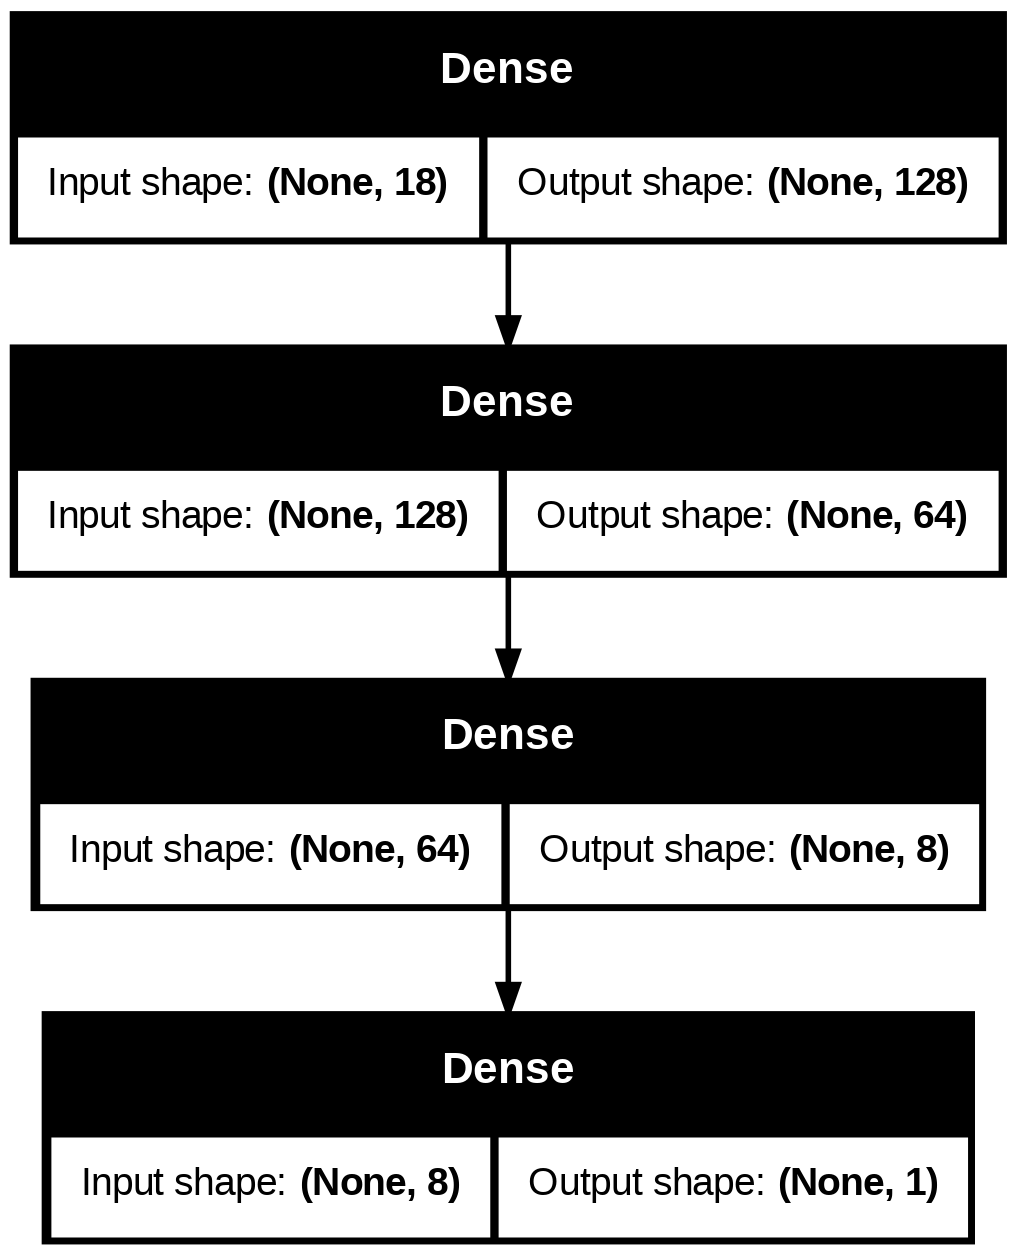

In [60]:
from keras.utils import plot_model

plot_model(model, to_file='model.png',show_shapes=True)

In [61]:
#2. Compilacion del Modelo
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [62]:
#3. Entrenamiento del Modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100,batch_size=128, verbose=1)

Epoch 1/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6491 - loss: 0.6076 - val_accuracy: 0.7414 - val_loss: 0.5226
Epoch 2/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7332 - loss: 0.5327 - val_accuracy: 0.7457 - val_loss: 0.5189
Epoch 3/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7370 - loss: 0.5272 - val_accuracy: 0.7480 - val_loss: 0.5183
Epoch 4/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7384 - loss: 0.5247 - val_accuracy: 0.7510 - val_loss: 0.5142
Epoch 5/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7420 - loss: 0.5196 - val_accuracy: 0.7497 - val_loss: 0.5118
Epoch 6/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7435 - loss: 0.5170 - val_accuracy: 0.7496 - val_loss: 0.5123
Epoch 7/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7428 - loss: 0.5170 - val_accuracy: 0.7520 - val_loss: 0.5117
Epoch 8/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7456 - loss: 0.5157 - val_accu

In [63]:
#4. evaluate the network
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.4f, Accuracy: %.2f%%" % (loss, accuracy*100))

475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7541 - loss: 0.5090

Loss: 0.5126, Accuracy: 75.31%


In [64]:
print(accuracy)

0.7531124353408813


In [65]:
acc.append(accuracy)

In [66]:
acc

[0.7548251103352875,
 0.7219550754232265,
 0.7283446413279757,
 0.758711547328898,
 0.7569988801791714,
 0.739806336868454,
 0.7550885975890916,
 0.7531124353408813]

In [67]:
# make class predictions with the model
pred = (model.predict(X_test) > 0.5).astype(int)
#pred=pred.flatten()

475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


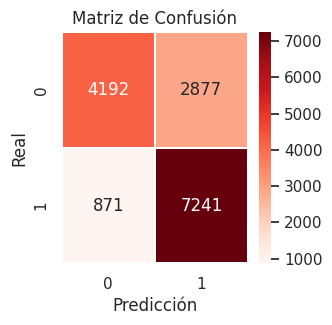

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

sns.set()

cm = confusion_matrix(y_test, pred, labels=[0,1])
f, (ax1) = plt.subplots(figsize=(3,3),nrows=1)

# crear mapa de calor dibujar mapa de calor: cmap="Blues"
sns.heatmap(pd.DataFrame(cm),linewidths = 0.05, annot=True, cmap="Reds",fmt='g')
ax1.set_title('Matriz de Confusión') #título
ax1.set_xlabel('Predicción') #eje x
ax1.set_ylabel('Real') #eje y
f.savefig('ANN.jpg')

In [69]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69      5063
           1       0.89      0.72      0.79     10118

    accuracy                           0.75     15181
   macro avg       0.74      0.77      0.74     15181
weighted avg       0.79      0.75      0.76     15181



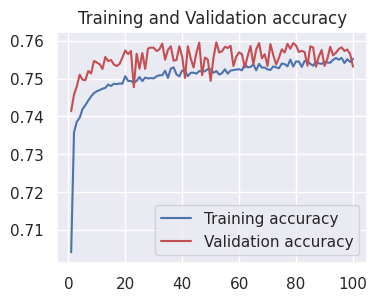

In [70]:
import matplotlib.pyplot as plt

accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

epochs = range(1, len(accu) + 1)

#plt.figure()
plt.figure(figsize=(4,3))
#Train and validation acc
plt.plot(epochs, accu, 'b', label='Training accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.show()

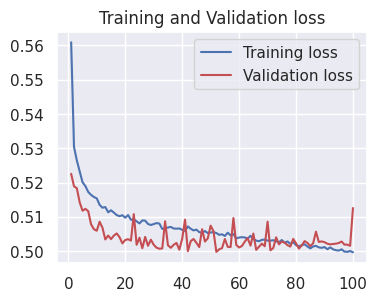

In [71]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(4,3))
#plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [72]:
acc

[0.7548251103352875,
 0.7219550754232265,
 0.7283446413279757,
 0.758711547328898,
 0.7569988801791714,
 0.739806336868454,
 0.7550885975890916,
 0.7531124353408813]

In [73]:
ex1 = acc[0] #RL
ex2 = acc[1] #DT
ex3 = acc[2] #RF
ex4 = acc[3] #GB
ex5 = acc[4] #XGB
ex6 = acc[5] #KNN
ex7 = acc[6] #SVM
ex8 = acc[7] #RNA

name=['RL:'+str(round(ex1,3)),'DT:'+str(round(ex1,3)),'RF:'+str(round(ex2,3)),'GB:'+str(round(ex3,3)),'XGB:'+str(round(ex3,3)),'KNN:'+str(round(ex3,3)),'SVM:'+str(round(ex3,3)),'RNA:'+str(round(ex3,3))]
acc=np.array(acc)

/tmp/ipython-input-3848836244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=acc*100,x=name,estimator=median,palette="flare") #"Blues_d")


Text(0, 0.5, 'Algorithm Name')

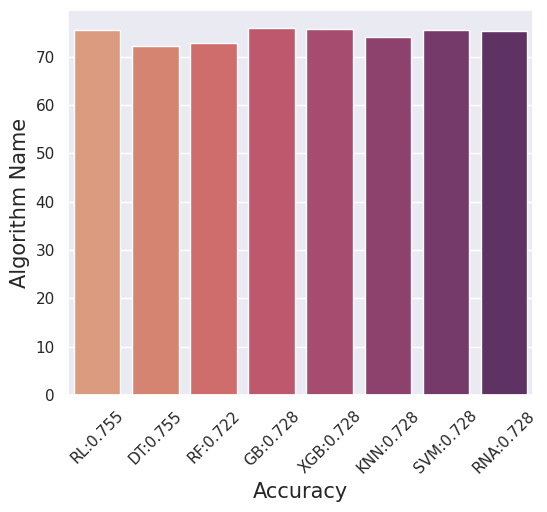

In [74]:
from numpy import median
plt.figure(figsize=(6,5))
sns.barplot(y=acc*100,x=name,estimator=median,palette="flare") #"Blues_d")
plt.xlabel('Accuracy',size=15)
plt.xticks(rotation=45)
plt.ylabel('Algorithm Name',size=15)

In [75]:
# Realizar predicciones en los datos de prueba
y_pred =(model.predict(X_test) > 0.5).astype(int)
y_pred =y_pred.flatten()
print(y_pred)

475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1 0 0 ... 0 0 0]


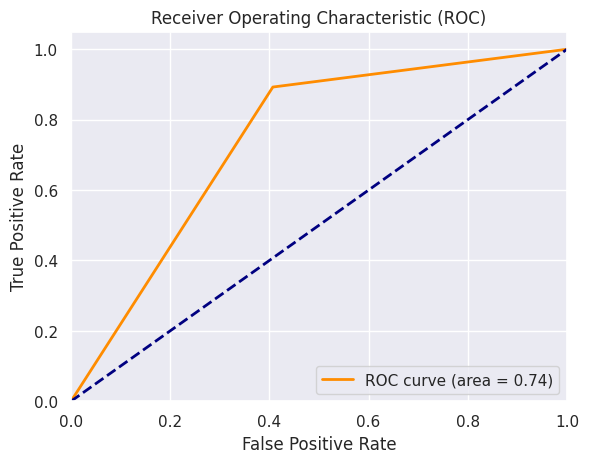

In [76]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción en el conjunto de prueba
y_probs = y_pred
#y_probs = model.predict(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))

Accuracy: 0.7531124431855609
Precision: 0.715655267839494
Recall: 0.8926282051282052
F1:  0.7944048272078991


optimizando la RED

In [ ]:
url = 'https://raw.githubusercontent.com/Darwin2016/dataset2022/refs/heads/main/dataSETS/diabetes5050.csv'
df = pd.read_csv(url, delimiter=',')
df.head()

,TieneDiabetes,PresionAlta,ColesterolAlto,ControlDeColesterol,IMC,Fumador,DerrameCerebral,EnfermedadCoronarioOInfartoDeMiocardio,ActividadFisica,IngestoDeFrutas,IngestoDeVegetales,Alcoholico,SaludGeneral,SaludMental,LesionesFisicas,DificultadEnCaminar,Sexo,Edad,Educacion
0,0.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0,1.0,1.0,13.0,5.0
1,0.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,1.0,2.0,13.0,3.0
2,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,30.0,0.0,0.0,2.0,4.0,6.0
3,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0
4,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,4.0


In [ ]:
# Split into input (X) and output (Y) variables.
X = df.iloc[:,1:19]
y = df.iloc[:,0]

In [ ]:
# Eliminar columnas por nombre:
X = df.drop(['TieneDiabetes','LesionesFisicas', 'Educacion'], axis=1)

In [ ]:
X.shape

(75904, 16)

In [ ]:
from sklearn.feature_selection import SelectKBest

best=SelectKBest(k=8)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['PresionAlta', 'ColesterolAlto', 'IMC',
       'EnfermedadCoronarioOInfartoDeMiocardio', 'ActividadFisica',
       'SaludGeneral', 'DificultadEnCaminar', 'Edad'],
      dtype='object')


In [ ]:
X_new.shape

(75904, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Seperar el dataframe en datos de train y datos de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42,stratify=y)

# Escalar los datos de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test.shape,X_train.shape

((15181, 8), (60723, 8))

In [ ]:
X_train.shape[1]

8

In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

In [ ]:
#1. Creación del Modelo - ANN
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Explicitly define the input shape using Input layer
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
# Configurar el optimizador Adam en compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Entrenamiento del Modelo
history = model.fit(X_train_scaled, y_train,validation_split=0.2,epochs=200,batch_size=128, verbose=1)

Epoch 1/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6981 - loss: 0.5906 - val_accuracy: 0.7425 - val_loss: 0.5212
Epoch 2/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7432 - loss: 0.5207 - val_accuracy: 0.7434 - val_loss: 0.5200
Epoch 3/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7428 - loss: 0.5204 - val_accuracy: 0.7437 - val_loss: 0.5201
Epoch 4/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7463 - loss: 0.5145 - val_accuracy: 0.7457 - val_loss: 0.5177
Epoch 5/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7481 - loss: 0.5156 - val_accuracy: 0.7464 - val_loss: 0.5165
Epoch 6/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7462 - loss: 0.5148 - val_accuracy: 0.7462 - val_loss: 0.5143
Epoch 7/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7488 - loss: 0.5115 - val_accuracy: 0.7457 - val_loss: 0.5144
Epoch 8/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7447 - loss: 0.5158 - val_accu

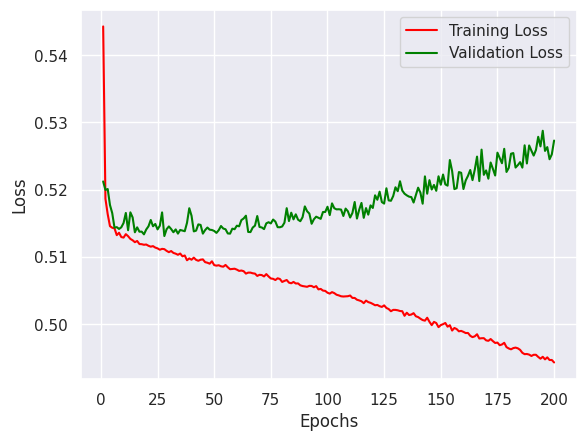

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y precisión en cada época
loss = history.history['loss']
val_loss = history.history['val_loss']

epocas=range(1,len(loss)+1)
# Graficar la evolución de la pérdida
plt.plot(epocas,loss,color='red', label='Training Loss')
plt.plot(epocas,val_loss,color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

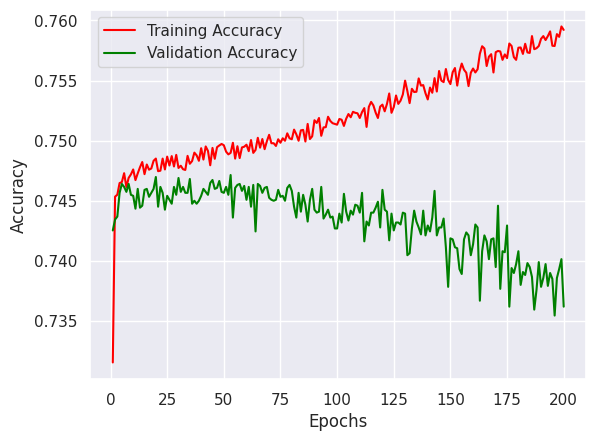

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de precisión en cada época

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epocas=range(1,len(accuracy)+1)
# Graficar la evolución de la precisión y la precisión durante el entrenamiento
plt.plot(epocas,accuracy,color='red', label='Training Accuracy')
plt.plot(epocas,val_accuracy,color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras import regularizers
from keras.models import Model,Sequential
from keras.layers import Dense,Input,Dropout,LeakyReLU
from keras.optimizers import Adam

In [ ]:
#Creación de otro Modelo de - ANN
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Explicitly define the input shape using Input layer
model.add(Dense(128,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#Compilacion del Modelo
# Configurar el optimizador Adam en compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Entrenamiento del Modelo
history = model.fit(X_train_scaled, y_train,validation_split=0.2,epochs=200,batch_size=50, verbose=1)

Epoch 1/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6970 - loss: 1.2354 - val_accuracy: 0.7443 - val_loss: 0.6038
Epoch 2/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7361 - loss: 0.6161 - val_accuracy: 0.7424 - val_loss: 0.5792
Epoch 3/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7342 - loss: 0.6004 - val_accuracy: 0.7437 - val_loss: 0.5731
Epoch 4/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7351 - loss: 0.5998 - val_accuracy: 0.7407 - val_loss: 0.5749
Epoch 5/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7353 - loss: 0.5950 - val_accuracy: 0.7425 - val_loss: 0.5679
Epoch 6/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7366 - loss: 0.5910 - val_accuracy: 0.7427 - val_loss: 0.5671
Epoch 7/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7344 - loss: 0.5924 - val_accuracy: 0.7419 - val_loss: 0.5673
Epoch 8/200
972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7373 - loss: 0.5889 - val_accu

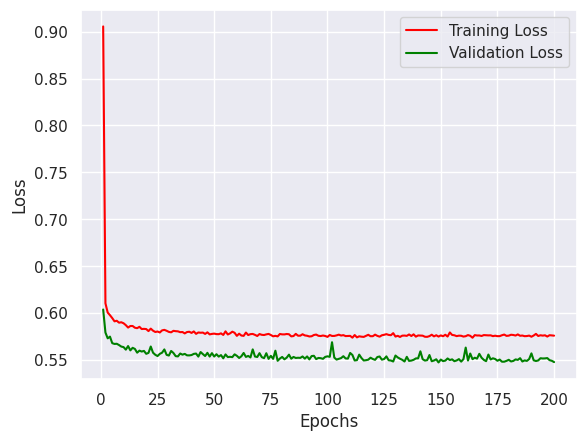

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y precisión en cada época
loss = history.history['loss']
val_loss = history.history['val_loss']

epocas=range(1,len(loss)+1)
# Graficar la evolución de la pérdida
plt.plot(epocas,loss,color='red', label='Training Loss')
plt.plot(epocas,val_loss,color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

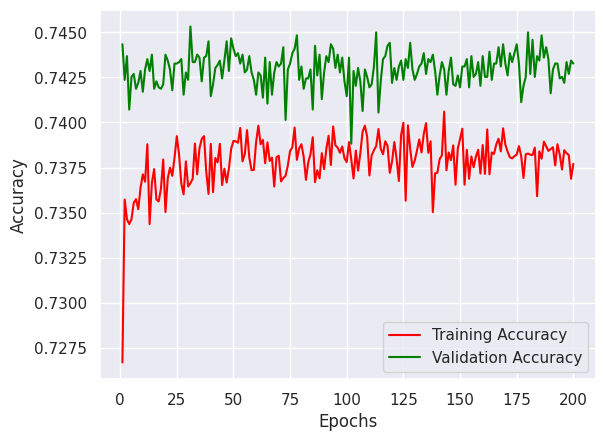

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de precisión en cada época

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epocas=range(1,len(accuracy)+1)
# Graficar la evolución de la precisión y la precisión durante el entrenamiento
plt.plot(epocas,accuracy,color='red', label='Training Accuracy')
plt.plot(epocas,val_accuracy,color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()